In [36]:
import numpy as np
import matplotlib.pyplot as plt

import decimal


# decimal.getcontext().prec = 5

In [37]:
def bolts(A2, A3, x, x_o):
    A1 = 303
    a = []
    y = []
    for i in A2:
        for k in x_o:
            for j in A3:
                b = A1 + (i - A1)/(1+np.exp((x-k)/j))
                a.append(b)
                y.append([i , j, k])
    return(np.array(a), np.array(y))

In [38]:
# def bolts_int(A2, A3, x, x_o):
#     A1 = 303
#     b = A1 + (A2-A1)/(1+np.exp((x-x_o)/A3))
#     return b

In [39]:
# A2 = 538.0080602192687
# A3 = 0.5503972556122777
# x_o = 28.00498305421301


In [40]:
A2 = np.linspace(303, 773, 20)
A3 = np.linspace(1, 10, 10)
x_o = np.linspace(1, 55, 35)
x = np.linspace(0, 55, 1000)

# mol = np.linspace(.1, 0.3, 10)

In [41]:
x_o

array([ 1.        ,  2.58823529,  4.17647059,  5.76470588,  7.35294118,
        8.94117647, 10.52941176, 12.11764706, 13.70588235, 15.29411765,
       16.88235294, 18.47058824, 20.05882353, 21.64705882, 23.23529412,
       24.82352941, 26.41176471, 28.        , 29.58823529, 31.17647059,
       32.76470588, 34.35294118, 35.94117647, 37.52941176, 39.11764706,
       40.70588235, 42.29411765, 43.88235294, 45.47058824, 47.05882353,
       48.64705882, 50.23529412, 51.82352941, 53.41176471, 55.        ])

In [42]:
e1, e2 = bolts(A2, A3, x, x_o)

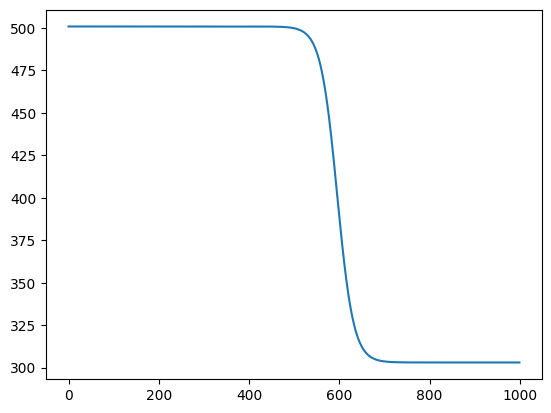

In [43]:
plt.plot(e1[3000])

In [44]:
e1 = np.array(e1)

In [45]:
e2 = np.array(e2)

In [46]:
e1

array([[303.        , 303.        , 303.        , ..., 303.        ,
        303.        , 303.        ],
       [303.        , 303.        , 303.        , ..., 303.        ,
        303.        , 303.        ],
       [303.        , 303.        , 303.        , ..., 303.        ,
        303.        , 303.        ],
       ...,
       [772.51485141, 772.51150464, 772.50813481, ..., 539.61721671,
        538.80861793, 538.        ],
       [771.95980733, 771.95343894, 771.94703166, ..., 539.43753073,
        538.71877209, 538.        ],
       [771.08703527, 771.07651761, 771.06594236, ..., 539.29378072,
        538.64689526, 538.        ]])

In [47]:
e2

array([[303.,   1.,   1.],
       [303.,   2.,   1.],
       [303.,   3.,   1.],
       ...,
       [773.,   8.,  55.],
       [773.,   9.,  55.],
       [773.,  10.,  55.]])

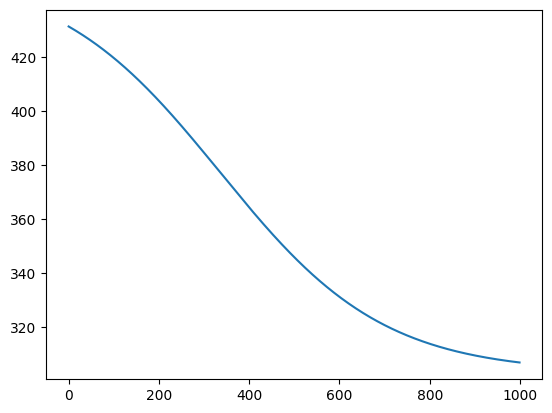

In [48]:
plt.plot(e1[2219])

In [49]:
from scipy import signal

# r1 = []
# for i in e1:
#     downsampled =  signal.resample(i, 1000)
#     r1.append(downsampled)

# r1 = np.array(r1).astype(np.half)

In [50]:
e2.shapez

(7000, 3)

In [51]:
np.save('final_profile_FINAL', e1)

In [52]:
np.save('final_param_FINAL', e2)